## Case Study - Measuring and Mitigating Bias with Holistic AI Library

A primeira etapa para executar a aplicação de bias metrics para regressão e classificação é relizar uma análise descritiva do conjunto de dados, o que nos ajuda a identificar certos padrões no conjunto de dados e que podem já trazer insights sobre informações contidas nas features.

### Adult Dataset

Neste estudo de caso utilizamos adult data set. Esse conjunto de dados é bastante utilizado em exercícios de machine learning e é adequado para realizarmos a aplicação de métricas de bias. O conjunto de dados possui features categóricas (workclass, education, marital-status, occupation, relationship, race, sex, and native-country) e integers features (age, years of study, capital gain, capital loss, and work hours per week). The prediction task is to determine whether a person makes over 50K a year (a classification task feature).

### Data Description and Exploration

First step is import the libraries that we need. Highlighted the use of [`holisticai`](https://www.holisticai.com/open-source) library, to apply a set of metrics and analysis concern bias.

In [1]:
import sys
sys.path.append('../../')

In [2]:
# import holistic ai 
from holisticai.datasets import load_adult # load adult dataset
from holisticai.bias.plots import group_pie_plot, success_rate_curves, histogram_plot, frequency_plot # import plots

# import data manipulation libraries
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = load_adult()['frame'] # save dataset as a dataframe 

Ao descrevermos os dados contínuos podemos notar a existência de 10 mil observações para cada variável, ou seja, a análise leva em consideração 10 mil indivíduos.

In [3]:
df.describe() # statistical description

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


No gráfico circular abaixo podemos observar que neste conjunto de dados possui mais observações para male do que para female. Não necessariamente dados desequilibrados podem gerar resultados com bias, mas este pode ser um fator que influencia bias. Veremos estas relações com os resultados.

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [5]:
#print(np.mean(df.loc[(df['class'] == '<=50K')]['age']))
print(max(df['age']))

90.0


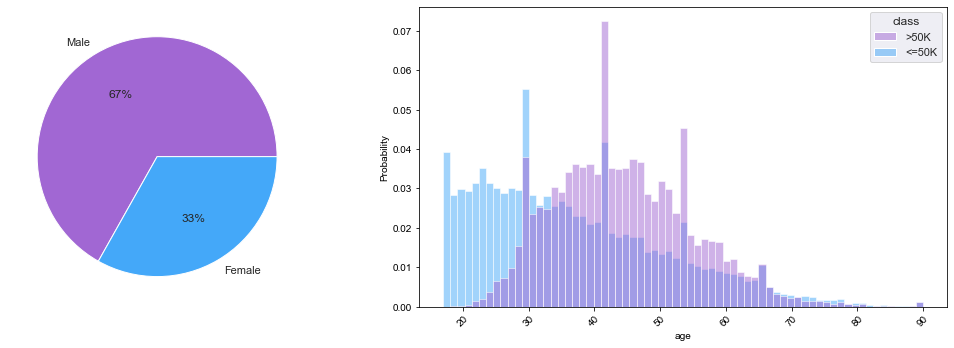

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(15,5))
group_pie_plot(df['sex'], ax = axes[0])
histogram_plot(df['age'], df['class'], ax = axes[1])
plt.tight_layout()

Pode se obsevrar duas informações importantes sobre este conjunto de dados. O primeiro ponto é o desequilíbrio observa entre o número de homens e mulheres. O gráfico circular mostra que 67% das observações no conjutno de dados são homens e apenas 33% de mulheres, isto é, um terço da base de dados são informações relacionadas à homens. Dessa maneira, temos uma visualização clara da participação de homens e mulheres na base de dados.

Por outro lado, a comparação entre o gráfico de distribução da idade entre as pessoas que receberam mais ou menos de 50K no ano mostra que a média das pessoas que receberam mais de 50K está em torno de 44, enquanto que o conjunto de pessoas que recebe menos de 50K possui em médi 36 anos. Nesse sentido, podemos afirmar que para o conjunto de dados analisado as pessoas que recebem mais de 50K possuem em média uma idade maior do que as pessoas que recebem menos de 50K. É razoável imaginar que pessoas mais velhas tenham maiores rendimentos atrelados à experiência.

Observando o gráfico abaixo podemos notar que existe um número maior de observações para indivíduos com High-School Grad (HS-grad), bachelors, and some college degree.

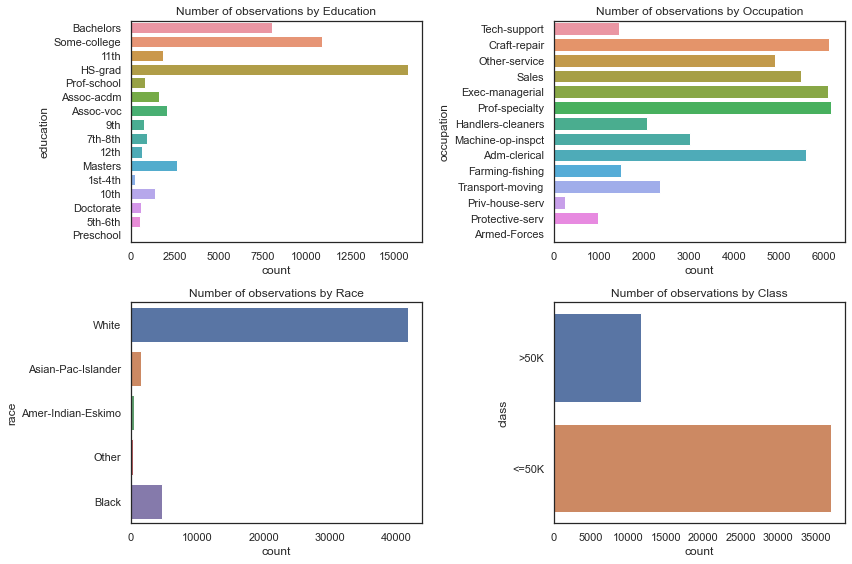

In [7]:
plt.style.use('seaborn-ticks')
fig, axes = plt.subplots(ncols=2, nrows= 2, figsize=(12,8))
sns.countplot(y="education", data=df, ax = axes[0,0]).set_title('Number of observations by Education')
sns.countplot(y="occupation", data=df, ax = axes[0,1]).set_title('Number of observations by Occupation')
sns.countplot(y="race", data=df, ax = axes[1,0]).set_title('Number of observations by Race')
sns.countplot(y="class", data=df, ax = axes[1,1]).set_title('Number of observations by Class')
plt.tight_layout()

### Measuring Bias

#### Pre-processing

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df['age'] = df['age'].astype(float)
data = df.apply(LabelEncoder().fit_transform)

In [10]:

drop_elements = ['education', 'native-country', 'class', 'age', 'hours-per-week'] # excluded variables
y = data["class"] # target variable
X = data.drop(drop_elements, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # training data splited 

#### Model Training

Neste exercício utilizamos como referência o modelo de classification _Logistic Regression_ aplicado ao conjunto de dados de interesse.

In [11]:
# Train a simple linear regression model
LogR = LogisticRegression()
model = LogR.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

C:\Users\kleyt\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# compute efficacy metrics
from sklearn.metrics import balanced_accuracy_score, f1_score

print('Accuracy: ', balanced_accuracy_score(y_pred, y_test))
print('F1 Score: ', f1_score(y_pred, y_test))

Accuracy:  0.7477053721781413
F1 Score:  0.48522634860395775


#### Bias Metrics

Aqui utilizamos a função `classification_bias_metrics` para gerar resultados para quatro métricas:

- Statistical Parity
- Disparate Impact
- Four Fifths Rule
- Cohen-D
- 2SD Rule

Esses resultados podem ser melhor analisados no [Roadmaps for Risk Mitigations](https://holisticai.gitbook.io/roadmaps-for-risk-mitigation/mitigation-roadmaps/measuring-bias-and-discrimination) preparado pela Holistic AI.

In [13]:
from holisticai.bias.metrics import classification_bias_metrics

# male == 1 and female == 0
group_a = np.array(X_test['sex']==1)
group_b = np.array(X_test['sex']==0)
y_pred  = np.array(model.predict(X_test))

classification_bias_metrics(group_a, group_b, y_pred, metric_type='equal_outcome')

,Value,Reference
Metric,,
Statistical Parity,0.124063,0
Disparate Impact,3.263463,1
Four Fifths Rule,0.306423,1
Cohen D,0.365967,0
2SD Rule,16.837744,0


### Mitigating Bias

In [4]:
# Dataframe

from sklearn.model_selection import train_test_split
protected_variables = ["sex", "race"]
output_variable = ["class"]

# Simple preprocessing
y = df[output_variable].replace({">50K": 1, "<=50K": 0})
X = pd.get_dummies(df.drop(protected_variables + output_variable, axis=1))
group = ["sex"]
group_a = df[group] == "Female"
group_b = df[group] == "Male"
data_ = [X, y, group_a, group_b]

# Train test split
dataset = train_test_split(*data_, test_size=0.2, shuffle=True)
train_data = dataset[::2]
test_data = dataset[1::2]

In [5]:
from holisticai.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from holisticai.bias.metrics import classification_bias_metrics

pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('model', LogisticRegression())
    ])

X_train, y_train, group_a, group_b = train_data
pipeline.fit(X_train, y_train)

X_test, y_test, group_a, group_b = train_data
y_pred = pipeline.predict(X_test)

baseline_metric = classification_bias_metrics(group_a, group_b, y_pred, y_test, metric_type='both')

C:\Users\kleyt\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from holisticai.bias.mitigation import Reweighing
from holisticai.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from holisticai.bias.mitigation import GridSearchReduction

model = GridSearchReduction(constraints="DemographicParity")
model.transform_estimator(LogisticRegression())

pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('bm_preprocessing',Reweighing()),
    ('model', LogisticRegression()),
    ])

X_train, y_train, group_a, group_b = train_data
pipeline.fit(X_train, y_train, bm__group_a=group_a, bm__group_b=group_b)

X_test, y_test, group_a, group_b = train_data
y_pred = pipeline.predict(X_test)

bm_pre_metric = classification_bias_metrics(group_a, group_b, y_pred, y_test, metric_type='both')

C:\Users\kleyt\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


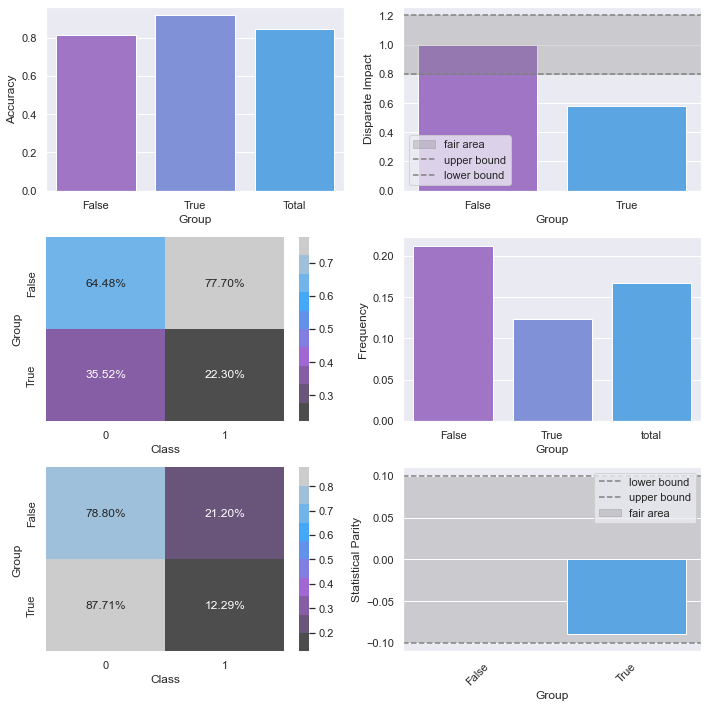

In [15]:
import matplotlib.pyplot as plt
from holisticai.bias.plots import accuracy_bar_plot, disparate_impact_plot, frequency_matrix_plot, frequency_plot,  statistical_parity_plot


fig,axs = plt.subplots(3,2, figsize=(10,10))
accuracy_bar_plot(group_a, y_pred, y_test , ax=axs[0][0])
disparate_impact_plot(group_a, y_pred, ax=axs[0][1])
frequency_matrix_plot(group_a, y_pred, normalize='class', ax=axs[1][0])
frequency_plot(group_a, y_pred, ax = axs[1][1])
frequency_matrix_plot(group_a, y_pred, normalize='group', ax = axs[2][0])
statistical_parity_plot(group_a, y_pred, ax=axs[2][1])
plt.tight_layout()

In [18]:
from holisticai.bias.metrics import classification_bias_metrics
from holisticai.bias.mitigation import GridSearchReduction
from holisticai.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = GridSearchReduction(constraints="DemographicParity")
model.transform_estimator(LogisticRegression())

pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('bm_inprocessing', model),
    ])

X_train, y_train, group_a, group_b = train_data
pipeline.fit(X_train, y_train, bm__group_a=group_a, bm__group_b=group_b)

X_test, y_test, group_a, group_b = train_data
y_pred = pipeline.predict(X_test)

bm_inp_metric = classification_bias_metrics(group_a, group_b, y_pred, y_test, metric_type='both')

c:\Users\kleyt\AppData\Local\Programs\Python\Python310\lib\site-packages\holisticai\bias\mitigation\inprocessing\commons\classification\_constraints.py:114: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(
c:\Users\kleyt\AppData\Local\Programs\Python\Python310\lib\site-packages\holisticai\bias\mitigation\inprocessing\commons\classification\_constraints.py:114: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  lambda_event = (lambda_vec["+"] - self.ratio * lambda_vec["-"]).sum(
c:\Users\kleyt\AppData\Local\Programs\Python\Python310\lib\site-packages\holisticai\bias\mitigation\inprocessing\commons\classificat

In [19]:
from holisticai.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from holisticai.bias.mitigation import CalibratedEqualizedOdds

pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('model', LogisticRegression()),
    ('bm_postprocessing', CalibratedEqualizedOdds())
    ])

X_train, y_train, group_a, group_b = train_data
pipeline.fit(X_train, y_train, bm__group_a=group_a, bm__group_b=group_b)

X_test, y_test, group_a, group_b = train_data
y_pred = pipeline.predict(X_test,  bm__group_a=group_a, bm__group_b=group_b)

bm_post_metric = classification_bias_metrics(group_a, group_b, y_pred, y_test, metric_type='both')

C:\Users\kleyt\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df = pd.concat([baseline_metric.iloc[:,0],  bm_pre_metric.iloc[:,0], bm_inp_metric.iloc[:,0], bm_post_metric.iloc[:,:]], axis=1)
df.columns = ['Baseline', 'Reweighing', 'GridSearchReduction','CalibratedEqualizedOdds','Reference']
df

,Baseline,Reweighing,GridSearchReduction,CalibratedEqualizedOdds,Reference
Metric,,,,,
Statistical Parity,-0.174296,-0.091985,0.047368,-0.114535,0
Disparate Impact,0.307528,0.568085,1.357229,0.403279,1
Four Fifths Rule,0.307528,0.568085,0.736795,0.403279,1
Cohen D,-0.450502,-0.239624,0.133560,-0.320849,0
2SD Rule,-40.982899,-22.142880,12.395555,-29.502253,0
Equality of Opportunity Difference,-0.086721,0.132030,0.399080,0.057771,0
False Positive Rate Difference,-0.071540,-0.015189,0.080461,-0.048795,0
Average Odds Difference,-0.079130,0.058421,0.239771,0.004488,0
Accuracy Difference,0.112037,0.103912,0.088848,0.140139,0
